# Lab 04 &mdash; Parametric inference, part 2 &mdash; practice


**Please enter in the cell below your first name, last name, and student ID**

* <b>Name: Alpesh Kumar
* Student ID: 100995076<b>

In [2]:
# imports
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# fix random seed so that results are reproducible (do not change)
np.random.seed(42)

1. From the CDC' BRFSS dataset (`cdc.csv`), draw two random samples, of 30 female participants and 40 male participants, respectively. Using these samples, establish, using an appropriate two-sided test at level $\alpha=0.01$, if the true mean _height_ $\mu_F$ of a female participant is significantly different from that of a male participant $\mu_M$, and derive a $1-\alpha$ confidence interval estimate for $\mu_F-\mu_M$

In [4]:
# code for exercise 1
cdc = pd.read_csv("cdc.csv")


# 30 female participants
n_females = 30;
female_30 = cdc[cdc.gender == 'f'].sample(n_females)

# 40 male participants
n_males = 40;
male_40 = cdc[cdc.gender == 'm'].sample(n_males)

# create the two DescrStatsW instances
female_30_stats = sm.stats.DescrStatsW(female_30.height)
male_40_stats = sm.stats.DescrStatsW(male_40.height)

# create a CompareMeans instance with the two samples above
comp_means_instance = sm.stats.CompareMeans(female_30_stats,male_40_stats)

# it returns the t statistic, p-value and df (recall, df for Welch test is not trivial)
tstat, pval, df  = comp_means_instance.ttest_ind(usevar='unequal')
print('Value of T statistic ' + str(tstat))
print('P-value ' + str(pval))
print('Degrees of freedom ' + str(df))

Value of T statistic -9.479817795913904
P-value 7.400052729496241e-14
Degrees of freedom 64.75548662841457


The same <b>CompareMeans</b> instance can be used to derive a confidence interval for the difference of the two means with the function <b>tconfint_diff</b>

In [5]:
alpha = 0.01
comp_means_instance.tconfint_diff(alpha=alpha,usevar='unequal')

(-8.67168371043757, -4.878316289562413)

2. Derive a 97%-confidence interval estimate (using the T distribution) for the mean weight using a random sample of 30 individuals from the CDC' BRFSS dataset (`cdc.csv`)

In [6]:
# code for exercise 2

n = 30
# draw a random sample of size 30
cdc_30_sample = cdc.sample(n)
weight_stats = sm.stats.DescrStatsW(cdc_30_sample.weight)
weight_stats.tconfint_mean(alpha=0.03)

(160.76589033732117, 191.1007763293455)

3. Draw a plot showing how many observations are required (y-axis), for different effect size values (x-axis), to obtain a power of 95% in a one-sided, left-tailed, one-sample t-test at level 0.01
    * Use a sequence of effect sizes between -2 and -0.5

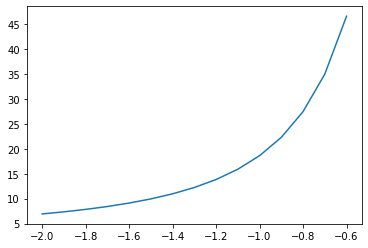

In [8]:
# code for exercise 3

power = 0.95
alpha=0.01

x = np.arange(-2, -0.5, 0.1)

# we need to vectorize our function so that it works for arrays
y = np.vectorize(sm.stats.tt_solve_power)

# plot on the x-axis the assumed true values, on the y-axis the corresponding power
plt.plot(x, y(effect_size=x, power=power, alpha=alpha, alternative='smaller'))
plt.show()
